# Hypothesis testing with Python

Extending analysis of marketing promotion data, I use the data to run a one-way ANOVA and a post hoc ANOVA test with Python to determine if the sales are significantly different among TV promotion types. In this project, I use plots and descriptive statistics to select a categorical independent variable, create and fit a linear regression model, check model assumptions, perform and interpre a one-way ANOVA test, compare pairs of groups using an ANOVA post hoc test, and interpret model outputs to share with stakeholders.

## **Step 1: Imports** 


In [1]:
# Import libraries and packages. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
# Import the data
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


### Variables:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

## **Step 2: Data exploration** 


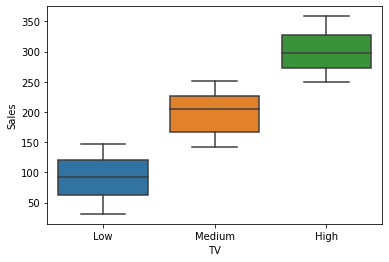

In [3]:
# Create a boxplot with TV and Sales to determine how Sales vary based on TV promotion budget.
sns.boxplot(x = "TV", y = "Sales", data = data)

Sales increase with the TV budget.

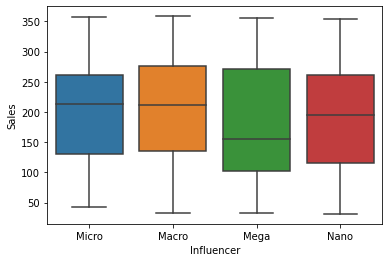

In [4]:
# Create a boxplot with Influencer and Sales to determine how Sales vary based on Influencer size category.
sns.boxplot(x = "Influencer", y = "Sales", data = data)


There does not appear to be much variation in the Sales means across Influencer category excpet possibly for the Mega category.

### Remove missing data


In [5]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)
#reset index
data.reset_index(inplace=True, drop=True)

# Confirm the data contains no missing values.
missing_data = data.isna().sum()
missing_data

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **Step 3: Model building** 


Since previous analysis indicated that the average sales of different categories of TV promotion budget varied more the with Influencer catergories, I selected TV for model building and further analysis.

In [6]:
# Define the OLS formula.
ols_formula = "Sales ~ C(TV)"

# Create an OLS model.
OLS = ols(formula=ols_formula, data=data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_summary = model.summary()

# Display the model results.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        03:22:49   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

### Normality Assumption

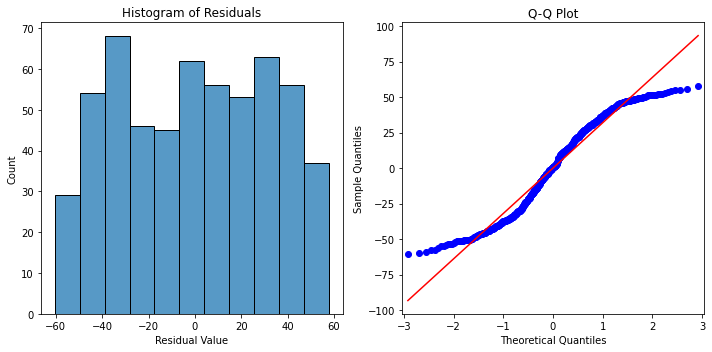

In [7]:
# Calculate the residuals.
residuals=model.resid

# Create a histogram with the residuals. 
# Create a QQ plot of the residuals.

# Create a 1x2 plot figures.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel('Residual Value')
# Set the title of the residual plot.
axes[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(model.resid, line='s', ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Q-Q Plot')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()


The histogram is only roughly normally shaped and the q-q plot has an s-shape that doesn't completely conform to the line, so the normality assumption might not be met.

### Homoscedasticity Assumption

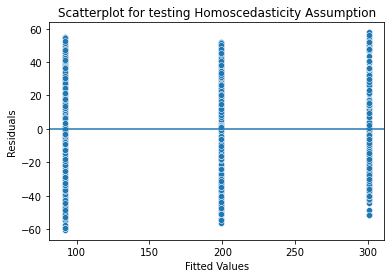

In [8]:
# Create a scatter plot with the fitted values from the model and the residuals.
 
fig = sns.scatterplot(x=model.fittedvalues, y=residuals)
# Set the x-axis label.
fig.set_xlabel("Fitted Values")
# Set the y-axis label.
fig.set_ylabel("Residuals")
# Set the title.
fig.set_title("Scatterplot for testing Homoscedasticity Assumption")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot.
plt.show()


There are gaps between the categorical levels, but the values seem evenly distributed on either side of the line representing y=0. The constant variance assumption is met.

## **Step 4: Results and evaluation** 

In [11]:
# Display the model results summary. 
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        03:28:59   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model using TV budget as the independent or predictor variable explains 87.4% of the variance in sales. Sales are 208.81 lower with a low compared to high TV budget and 101.51 with a medium compared to high budget. The coefficients ate statistically significant (p<.05).

### One-way ANOVA test

With the model fit, I ran a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [9]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


The p value is less than .05 so we can reject the null hypothesis and conclude that there is a significantly significant difference in sales between the different categories of TV budget.

### ANOVA post hoc test

Since I have significant results from the one-way ANOVA test, I run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [10]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


### Interpretation

The differences in mean sales between high and low TV budget, high and medium TV budget and low and medium TV budget are all statistically significant (p <.05). With each increase in TV budget, from low to medium to high, there is a statistically significant increase in sales, with about a 100 million increase in sales for each level of increase in the budget.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)